In [1]:
import pandas as pd
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Reading in the Data

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

Delete the zip file if it exists.

In [3]:
zip_file_path = "cardiovascular-diseases-risk-prediction-dataset.zip"  # Specify the file path

if os.path.exists(zip_file_path):  # Check if the file exists
    os.remove(zip_file_path)  # Remove the file
    
    print(f"File '{zip_file_path}' has been successfully removed.")
else:
    print(f"File '{zip_file_path}' does not exist.")

File 'cardiovascular-diseases-risk-prediction-dataset.zip' does not exist.


Retrieve the zipped data set from kaggle and save it into the default directory.

In [4]:
os.environ['KAGGLE_USERNAME'] = 'reesemcdonald'  # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = '7796176eb7a5d98c8c63ffb78535a6ac'  # Replace with your Kaggle API key

!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset

Error processing line 3 of C:\Users\rsmcd\anaconda3\lib\site-packages\googleapis_common_protos-1.56.4-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\rsmcd\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

  0%|          | 0.00/4.87M [00:00<?, ?B/s]
 21%|##        | 1.00M/4.87M [00:01<00:04, 873kB/s]
 41%|####1     | 2.00M/4.87M [00:02<00:02, 1.01MB/s]
 62%|######1   | 3.00M/4.87M [00:02<00:01, 1.15MB/s]
 82%|########2 | 4.00M/4.87M [00:03<00:00, 1.24MB/s]
100%|##########| 4.87M/4.87M [00:04<00:00, 1.35MB/s]
100%|##########| 4.87M/4.87M [00:04<00:00, 1.22MB/s]


Delete the extracted subdirectory if it exists.

In [5]:
subdirectory_path = "cardiovascular-diseases-risk-prediction-dataset"  # Specify the subdirectory path

if os.path.exists(subdirectory_path):  # Check if the subdirectory exists
    shutil.rmtree(subdirectory_path)  # Remove the subdirectory and its contents
    print(f"Subdirectory '{subdirectory_path}' has been successfully deleted.")
else:
    print(f"Subdirectory '{subdirectory_path}' does not exist.")

Subdirectory 'cardiovascular-diseases-risk-prediction-dataset' does not exist.


Extract the zip file into a subdirectory.

In [6]:
zip_file_path = "cardiovascular-diseases-risk-prediction-dataset.zip"  # Update with the actual path to your ZIP file

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("cardiovascular-diseases-risk-prediction-dataset")  # Update "destination_directory" with the desired directory path

# Perform further operations on the extracted files

# The ZIP file is automatically closed after exiting the `with` block

Create the file path necessary to write the data set to a data frame object.

In [7]:
folder_path = "cardiovascular-diseases-risk-prediction-dataset"  # Specify the folder path
file_name = "CVD_cleaned.csv"  # Specify the file name

file_path = os.path.join(folder_path, file_name)  # Combine the folder path and file name

# Read the CSV file into a pandas DataFrame
cdrpd = pd.read_csv(file_path)

# Remove symbols '%', '$', and ','
# wd23 = wd23.replace(['%', '\$', ','], '', regex=True)

# You can now use the 'wd23' DataFrame to work with the data from the CSV file

Clean up and save space.

In [8]:
zip_file_path = "cardiovascular-diseases-risk-prediction-dataset.zip"  # Specify the file path

if os.path.exists(zip_file_path):  # Check if the file exists
    os.remove(zip_file_path)  # Remove the file
    print(f"File '{zip_file_path}' has been successfully removed.")
else:
    print(f"File '{zip_file_path}' does not exist.")
    
subdirectory_path = "cardiovascular-diseases-risk-prediction-dataset"  # Specify the subdirectory path

if os.path.exists(subdirectory_path):  # Check if the subdirectory exists
    shutil.rmtree(subdirectory_path)  # Remove the subdirectory and its contents
    print(f"Subdirectory '{subdirectory_path}' has been successfully deleted.")
else:
    print(f"Subdirectory '{subdirectory_path}' does not exist.")

File 'cardiovascular-diseases-risk-prediction-dataset.zip' has been successfully removed.
Subdirectory 'cardiovascular-diseases-risk-prediction-dataset' has been successfully deleted.


Taking a look around.

In [9]:
print(file_path)
cdrpd

cardiovascular-diseases-risk-prediction-dataset\CVD_cleaned.csv


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0000,32.6600,14.5400,Yes,0.0000,30.0000,16.0000,12.0000
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0000,77.1100,28.2900,No,0.0000,30.0000,0.0000,4.0000
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0000,88.4500,33.4700,No,4.0000,12.0000,3.0000,16.0000
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0000,93.4400,28.7300,No,0.0000,30.0000,30.0000,8.0000
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0000,88.4500,24.3700,Yes,0.0000,8.0000,4.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0000,81.6500,29.0500,No,4.0000,30.0000,8.0000,0.0000
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0000,69.8500,21.4800,No,8.0000,15.0000,60.0000,4.0000
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0000,61.2300,24.6900,Yes,4.0000,40.0000,8.0000,4.0000
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0000,79.3800,23.7300,No,3.0000,30.0000,12.0000,0.0000


## Inspecting, Cleaning, Adding Features to the Data

In [10]:
column_info = cdrpd.dtypes.reset_index()
column_info.columns = ['Column_Name', 'Data_Type']
column_info = column_info.sort_values(by='Data_Type').set_index('Column_Name')
column_info

,Data_Type
Column_Name,
FriedPotato_Consumption,float64
Fruit_Consumption,float64
Alcohol_Consumption,float64
BMI,float64
Weight_(kg),float64
Height_(cm),float64
Green_Vegetables_Consumption,float64
Smoking_History,object
Age_Category,object


In [11]:
# Check which columns have all unique values
columns_with_unique_values = cdrpd.columns[cdrpd.nunique() == len(cdrpd)]

# Print the columns with all unique values
print(columns_with_unique_values)

Index([], dtype='object')


Creating 'row_number' for possible use as a key for the SQL practice part of this project.

In [12]:
cdrpd['row_number'] = range(1, len(cdrpd) + 1)
cdrpd['row_number']

0              1
1              2
2              3
3              4
4              5
           ...  
308849    308850
308850    308851
308851    308852
308852    308853
308853    308854
Name: row_number, Length: 308854, dtype: int64

In [13]:
index_mapping = {
    'FriedPotato_Consumption': 'Fried_Potato_Consumption',
}
cdrpd = cdrpd.rename(columns=index_mapping)
cdrpd = cdrpd.applymap(lambda x: x.strip() if isinstance(x, str) else x)

Convert column names to lowercase and replace whitespace, hyphens, parentheses with underscores

In [14]:
cdrpd.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', '_').replace('(', '').replace(')', ''), 
            inplace=True)

cdrpd.columns

Index(['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer',
       'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex',
       'age_category', 'height_cm', 'weight_kg', 'bmi', 'smoking_history',
       'alcohol_consumption', 'fruit_consumption',
       'green_vegetables_consumption', 'fried_potato_consumption',
       'row_number'],
      dtype='object')

This cell converts metric columns to imperial and stores them in new columns.

In [15]:
cdrpd['weight_lbs'] = cdrpd['weight_kg']*2.20462
cdrpd['height_inches'] = cdrpd['height_cm']*0.393701
cdrpd['height_feet'] = cdrpd['height_inches']/12
cdrpd[['weight_lbs', 'height_inches', 'height_feet']]

,weight_lbs,height_inches,height_feet
0,72.0029,59.0552,4.9213
1,169.9982,64.9607,5.4134
2,194.9986,64.1733,5.3478
3,205.9997,70.8662,5.9055
4,194.9986,75.1969,6.2664
...,...,...,...
308849,180.0072,66.1418,5.5118
308850,153.9927,70.8662,5.9055
308851,134.9889,61.8111,5.1509
308852,175.0027,72.0473,6.0039


Counting the number of na values in each column

In [16]:
nan_counts = cdrpd.isna().sum()
print(nan_counts)

general_health                  0
checkup                         0
exercise                        0
heart_disease                   0
skin_cancer                     0
other_cancer                    0
depression                      0
diabetes                        0
arthritis                       0
sex                             0
age_category                    0
height_cm                       0
weight_kg                       0
bmi                             0
smoking_history                 0
alcohol_consumption             0
fruit_consumption               0
green_vegetables_consumption    0
fried_potato_consumption        0
row_number                      0
weight_lbs                      0
height_inches                   0
height_feet                     0
dtype: int64


Get lists of string columns and numerical columns

In [17]:
string_columns = cdrpd.select_dtypes(include='object').columns.tolist()
print(f'There are {len(string_columns)} string variables in the data set')
print(string_columns)
print()
numerical_columns = cdrpd.select_dtypes(include='float').columns.tolist()
print(f'There are {len(numerical_columns)} numerical variables in the data set')
print(numerical_columns)

There are 12 string variables in the data set
['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer', 'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex', 'age_category', 'smoking_history']

There are 10 numerical variables in the data set
['height_cm', 'weight_kg', 'bmi', 'alcohol_consumption', 'fruit_consumption', 'green_vegetables_consumption', 'fried_potato_consumption', 'weight_lbs', 'height_inches', 'height_feet']


In [18]:
def categorical_bars(data, column, font_size):
    
    # Update the default font size
    plt.rcParams.update({'font.size': font_size})
    
    plt.figure(figsize=(10, 6))

    # Get the value counts for the specified column
    value_counts = data[column].value_counts()

    # Filter out categories with only one occurrence
    value_counts = value_counts[value_counts > 1]
    
    ax = value_counts.plot(kind='bar', edgecolor='none')  # Remove the black line border

    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    
    # Add data labels (annotations) above each bar
    for index, value in enumerate(value_counts):
        plt.text(index, value + 1, str(value), ha='center', va='bottom')

    plt.show()

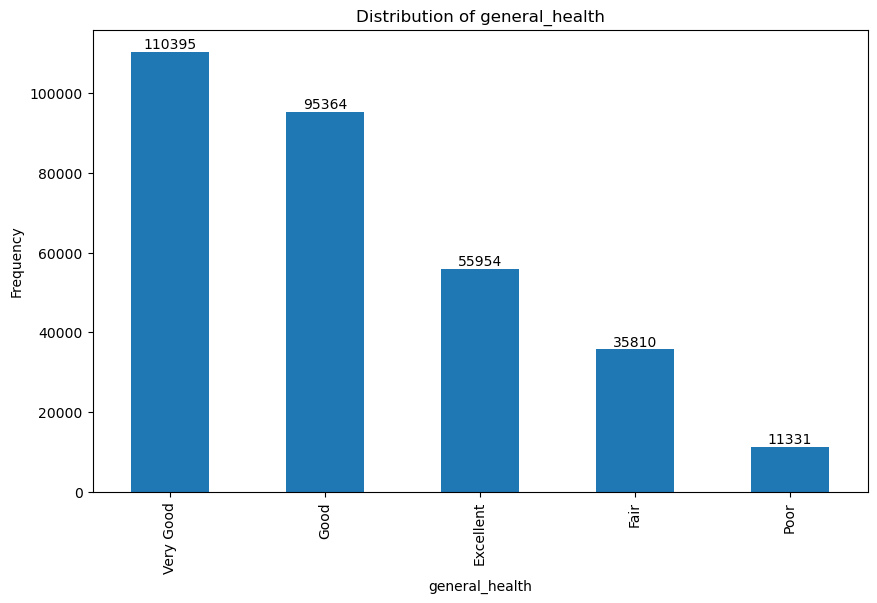

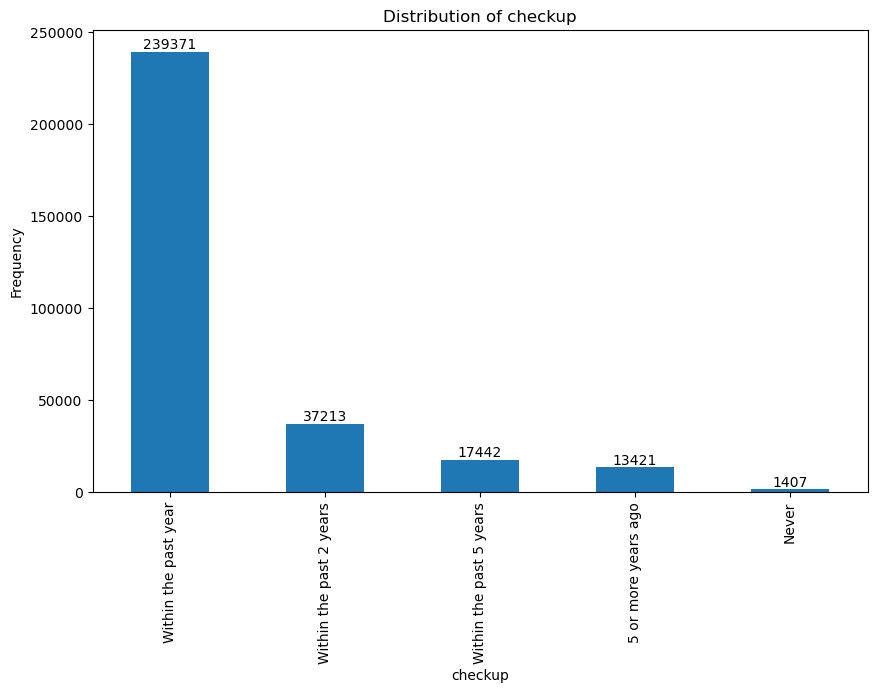

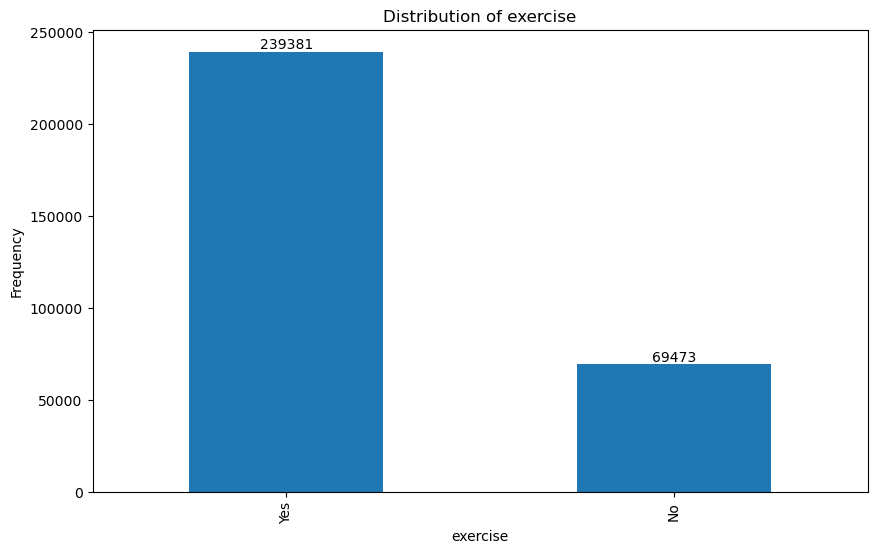

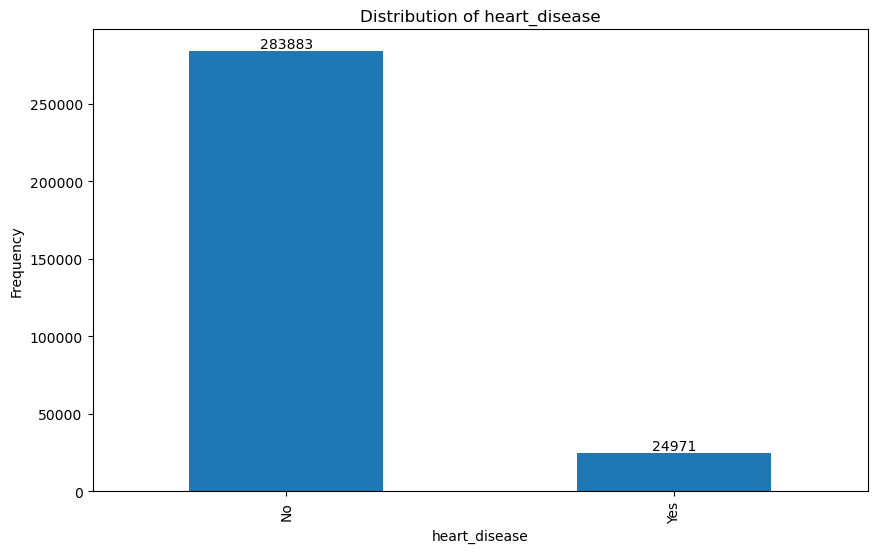

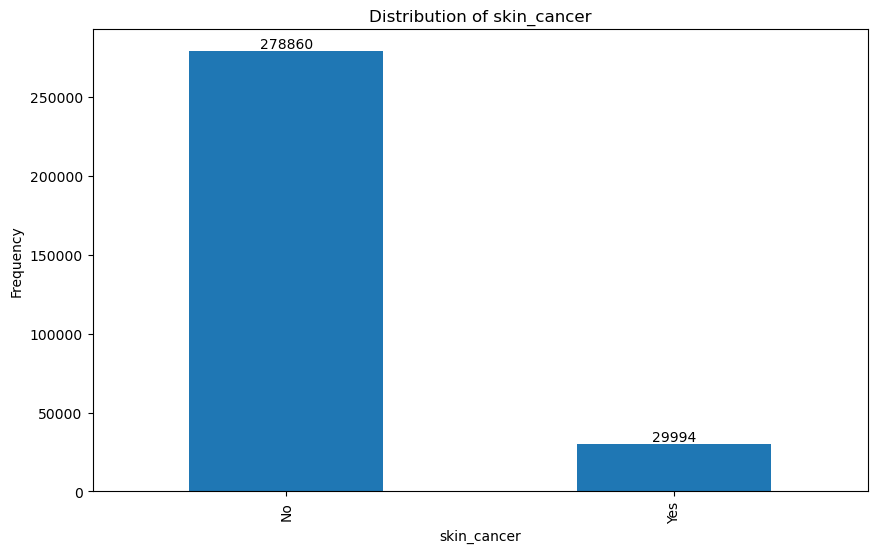

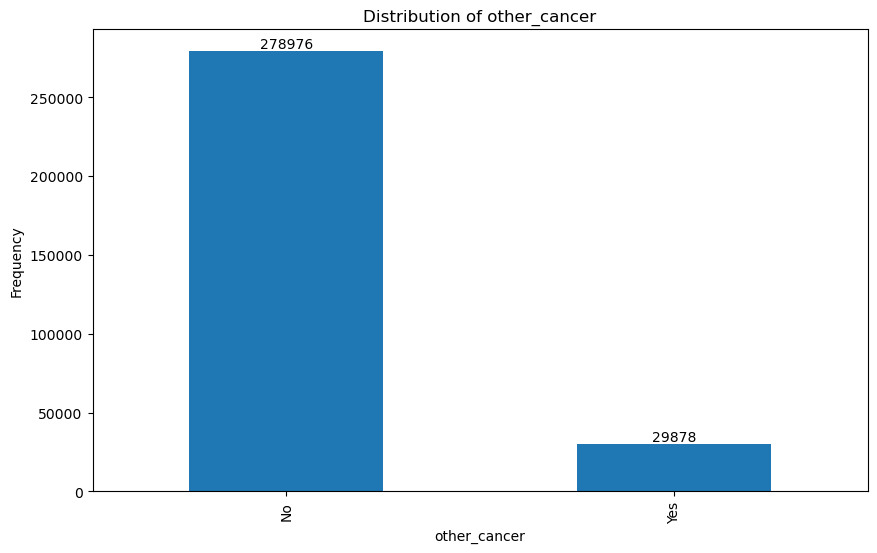

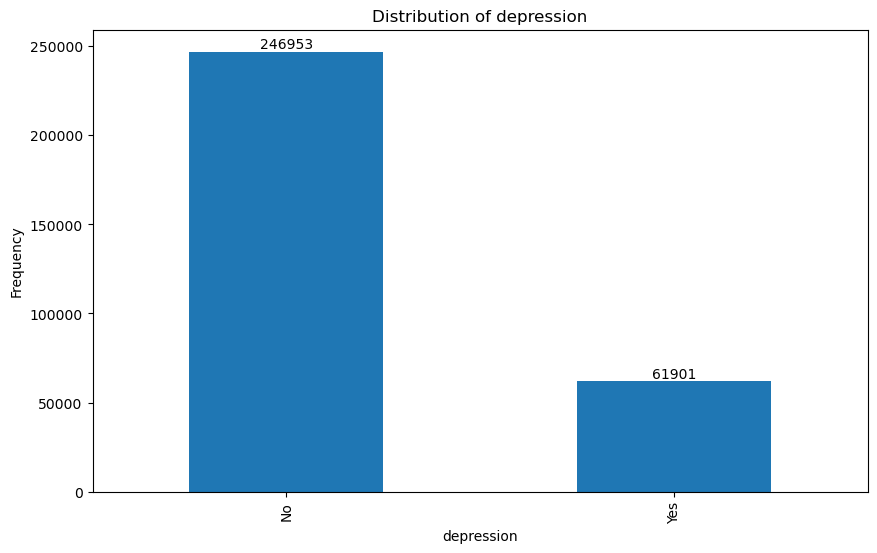

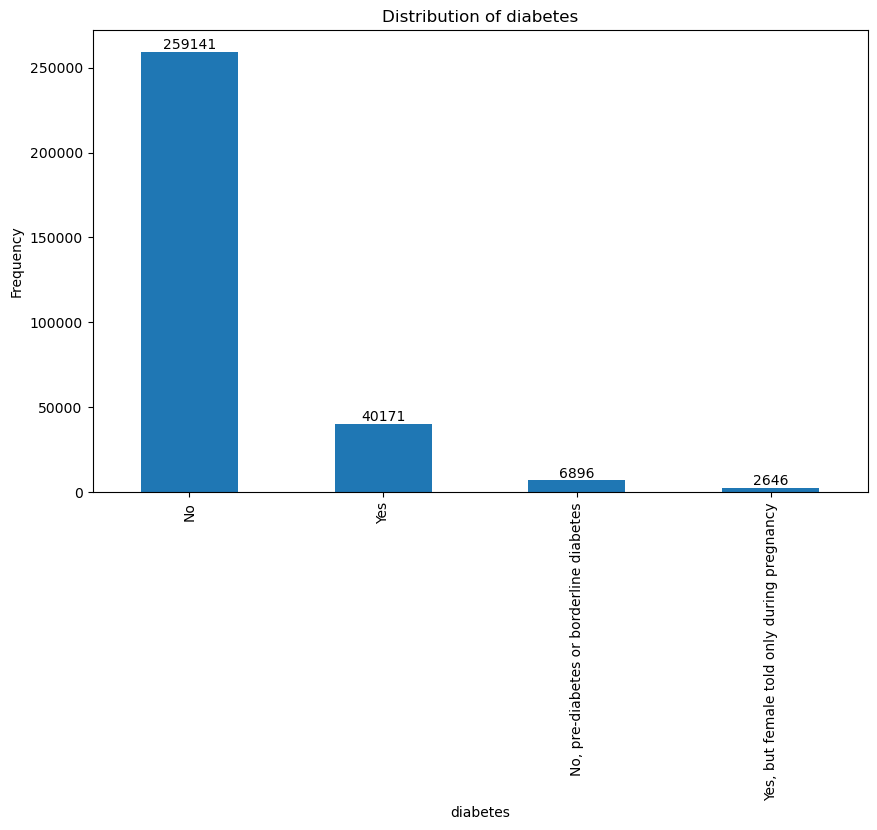

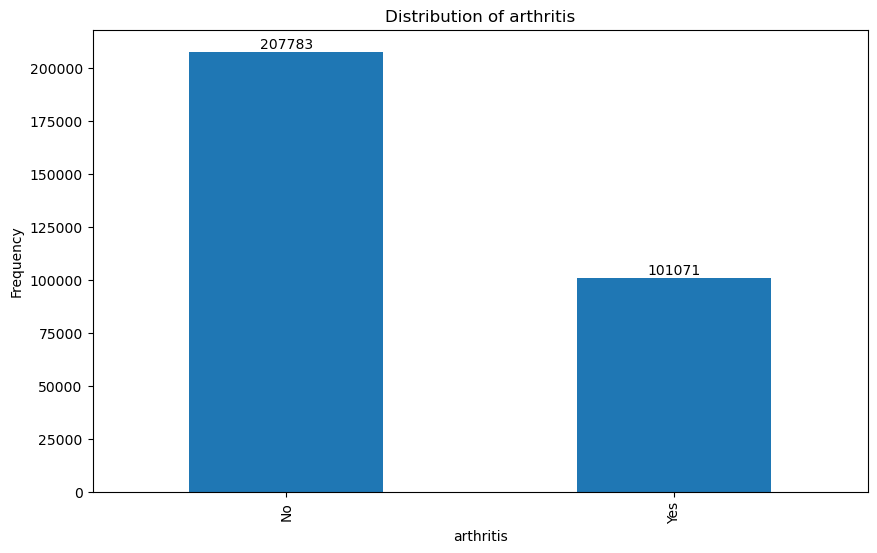

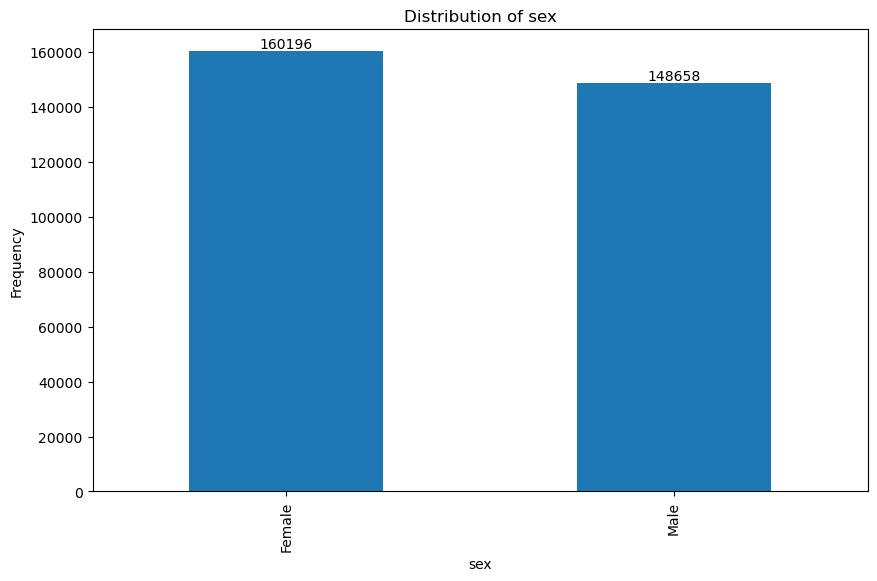

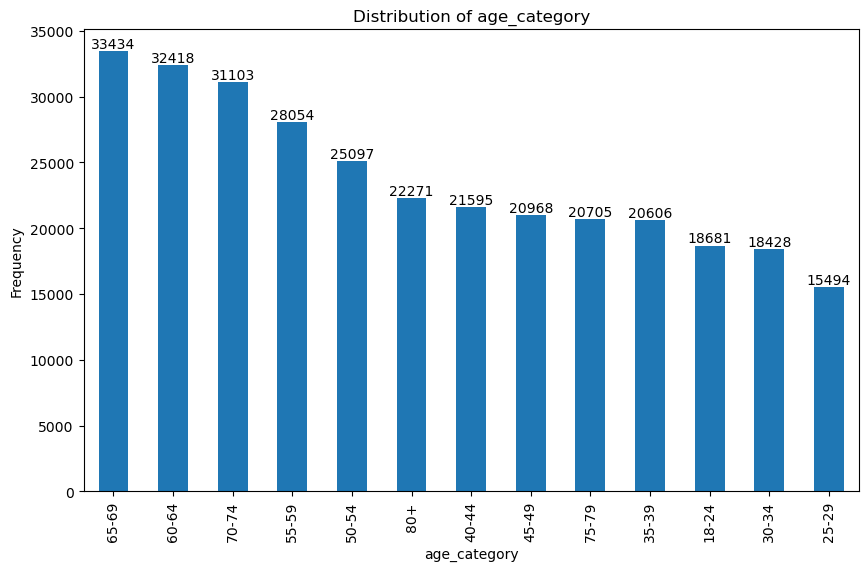

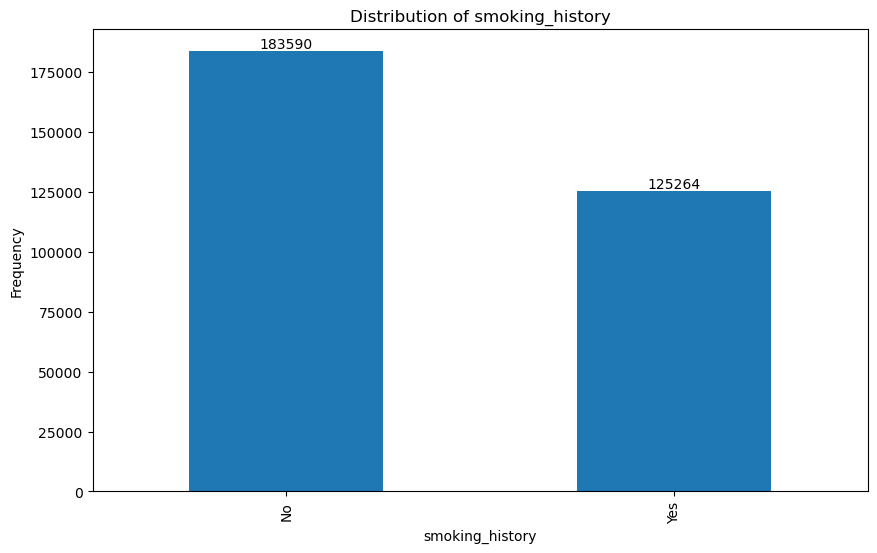

In [19]:
for string_column in string_columns:
    categorical_bars(cdrpd, string_column, 10)

In [20]:
# Descriptive Stats, Histograms

def numerical_description_and_histogram(numerical_col, data, num_bins, width, height):
    plt.rcParams.update({'font.size': 14})
    
    # Column name for which you want to create the histogram
    numerical_column = numerical_col
    
    plt.figure(figsize=(width, height))

    # Build the histogram
    plt.hist(data[numerical_column], bins=num_bins, edgecolor='black')  # Adjust the number of bins as needed

    # Customize the plot (optional)
    plt.title('Histogram of ' + numerical_column)
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Get descriptive statistics
    column_stats = data[numerical_column].describe()

    print("Descriptive Statistics for", numerical_column, "column:")
    print(column_stats)
    
    # Get the data from the column as a NumPy array
    column_data = data[numerical_column].values

    # Calculate kurtosis and skewness
    kurt = kurtosis(column_data, nan_policy='omit')  # Handle NaN values with 'omit'
    skw = skew(column_data, nan_policy='omit')  # Handle NaN values with 'omit'

    print("Kurtosis of", numerical_column, "column:", kurt)
    print("Skewness of", numerical_column, "column:", skw)
    
    # Show the plot
    plt.show()

Descriptive Statistics for height_cm column:
count   308854.0000
mean       170.6152
std         10.6580
min         91.0000
25%        163.0000
50%        170.0000
75%        178.0000
max        241.0000
Name: height_cm, dtype: float64
Kurtosis of height_cm column: 0.005746229556400806
Skewness of height_cm column: 0.015311122479299737


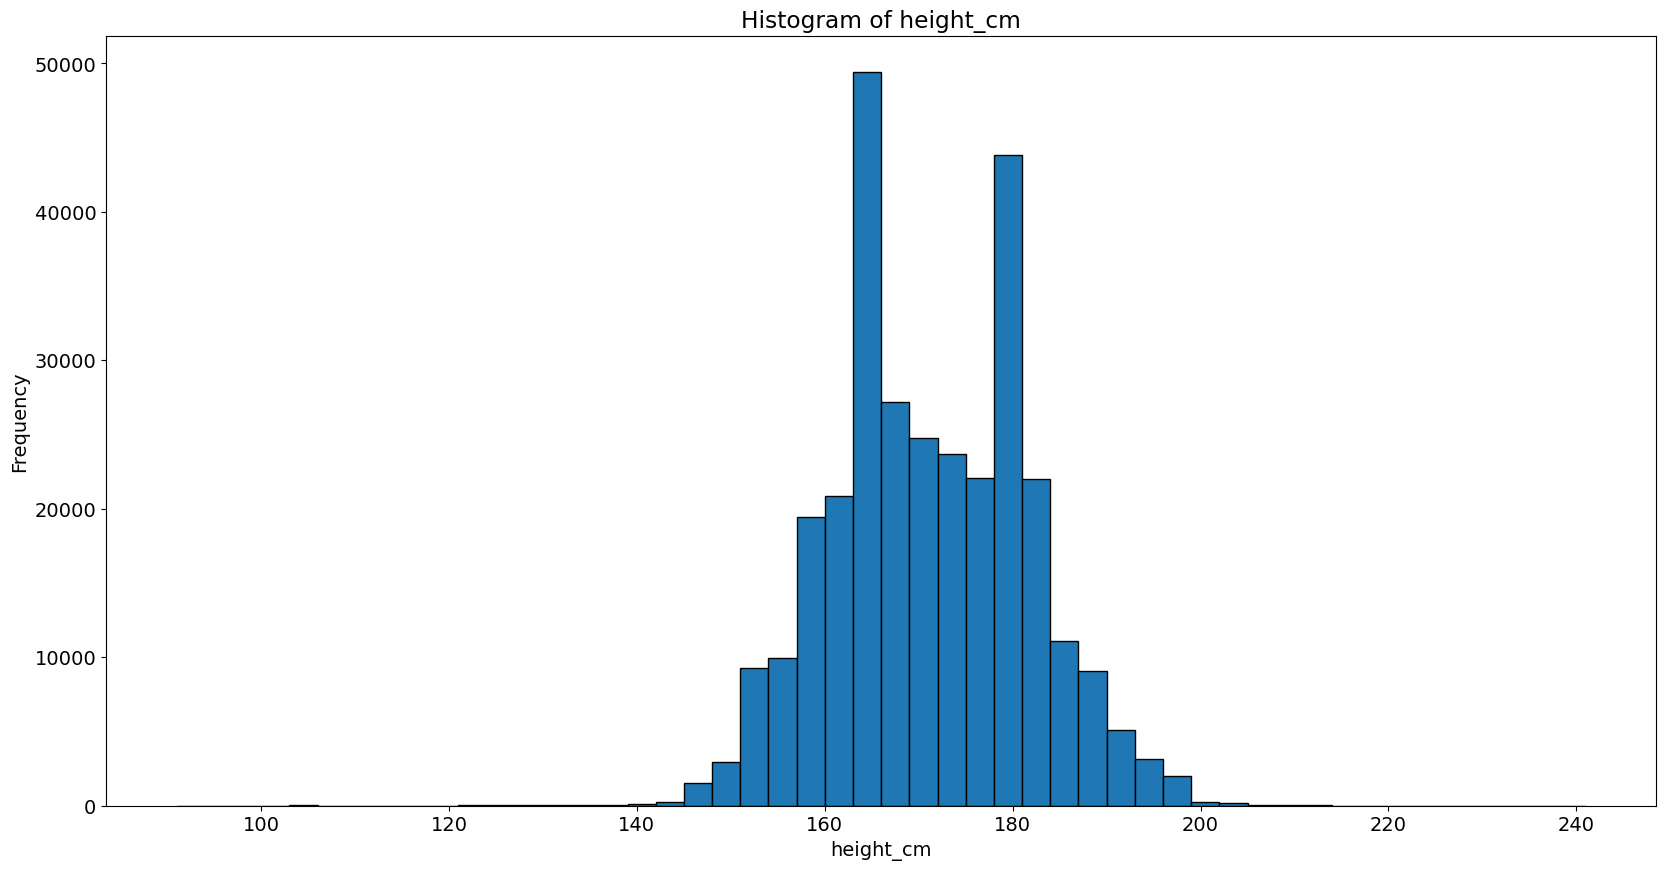

Descriptive Statistics for weight_kg column:
count   308854.0000
mean        83.5887
std         21.3432
min         24.9500
25%         68.0400
50%         81.6500
75%         95.2500
max        293.0200
Name: weight_kg, dtype: float64
Kurtosis of weight_kg column: 2.5736643123101075
Skewness of weight_kg column: 1.0581985546498378


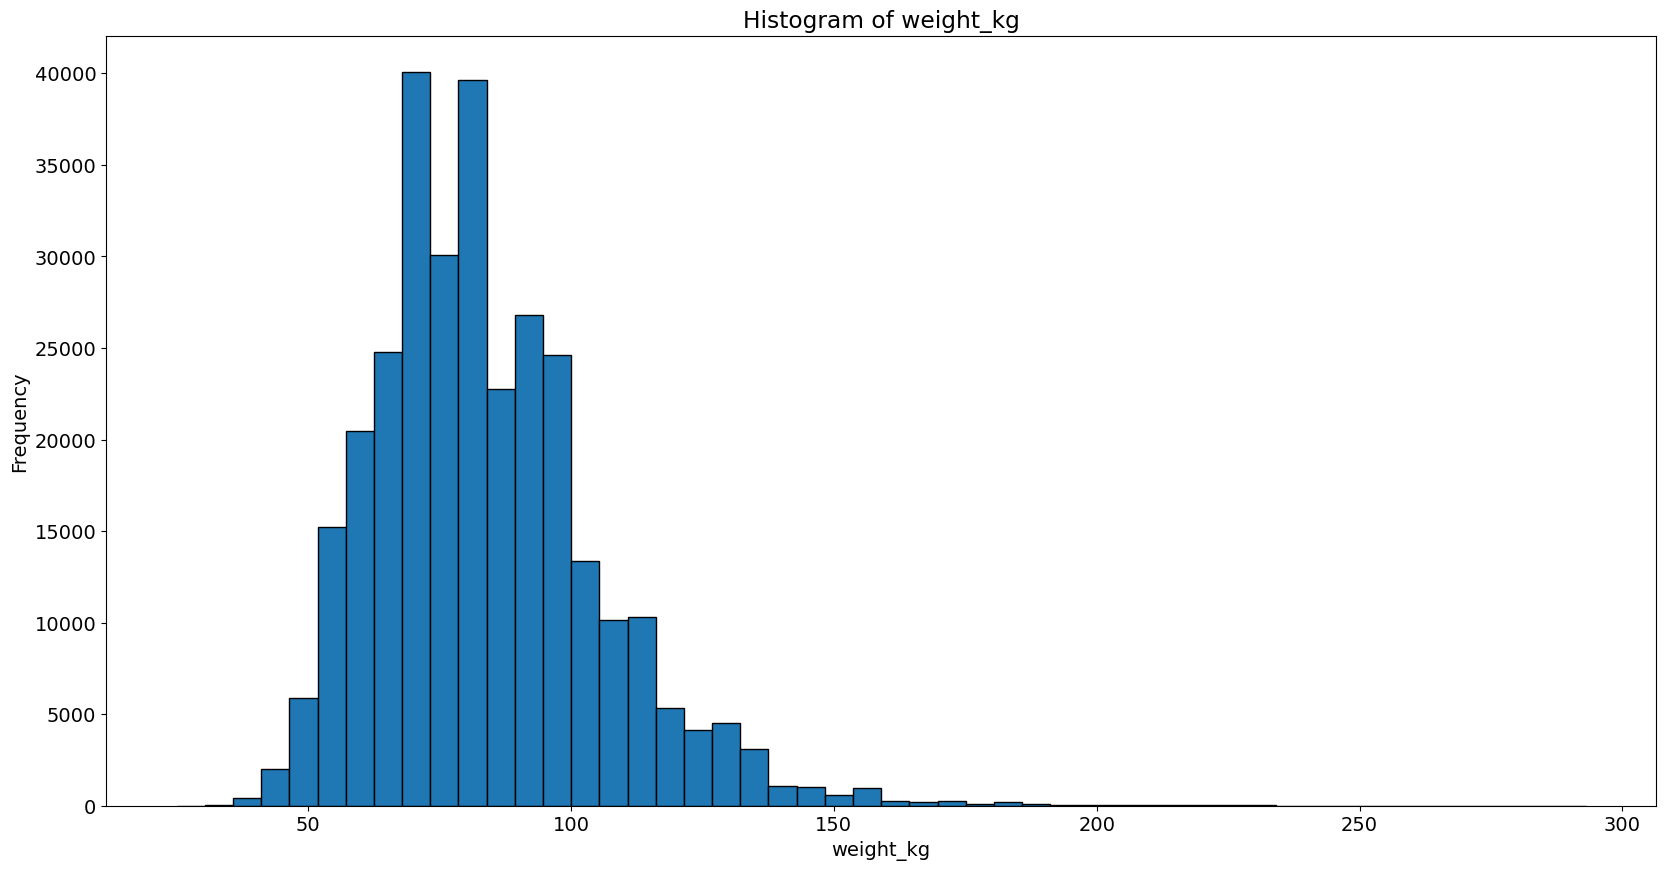

Descriptive Statistics for bmi column:
count   308854.0000
mean        28.6262
std          6.5223
min         12.0200
25%         24.2100
50%         27.4400
75%         31.8500
max         99.3300
Name: bmi, dtype: float64
Kurtosis of bmi column: 4.240969090063062
Skewness of bmi column: 1.376612568490472


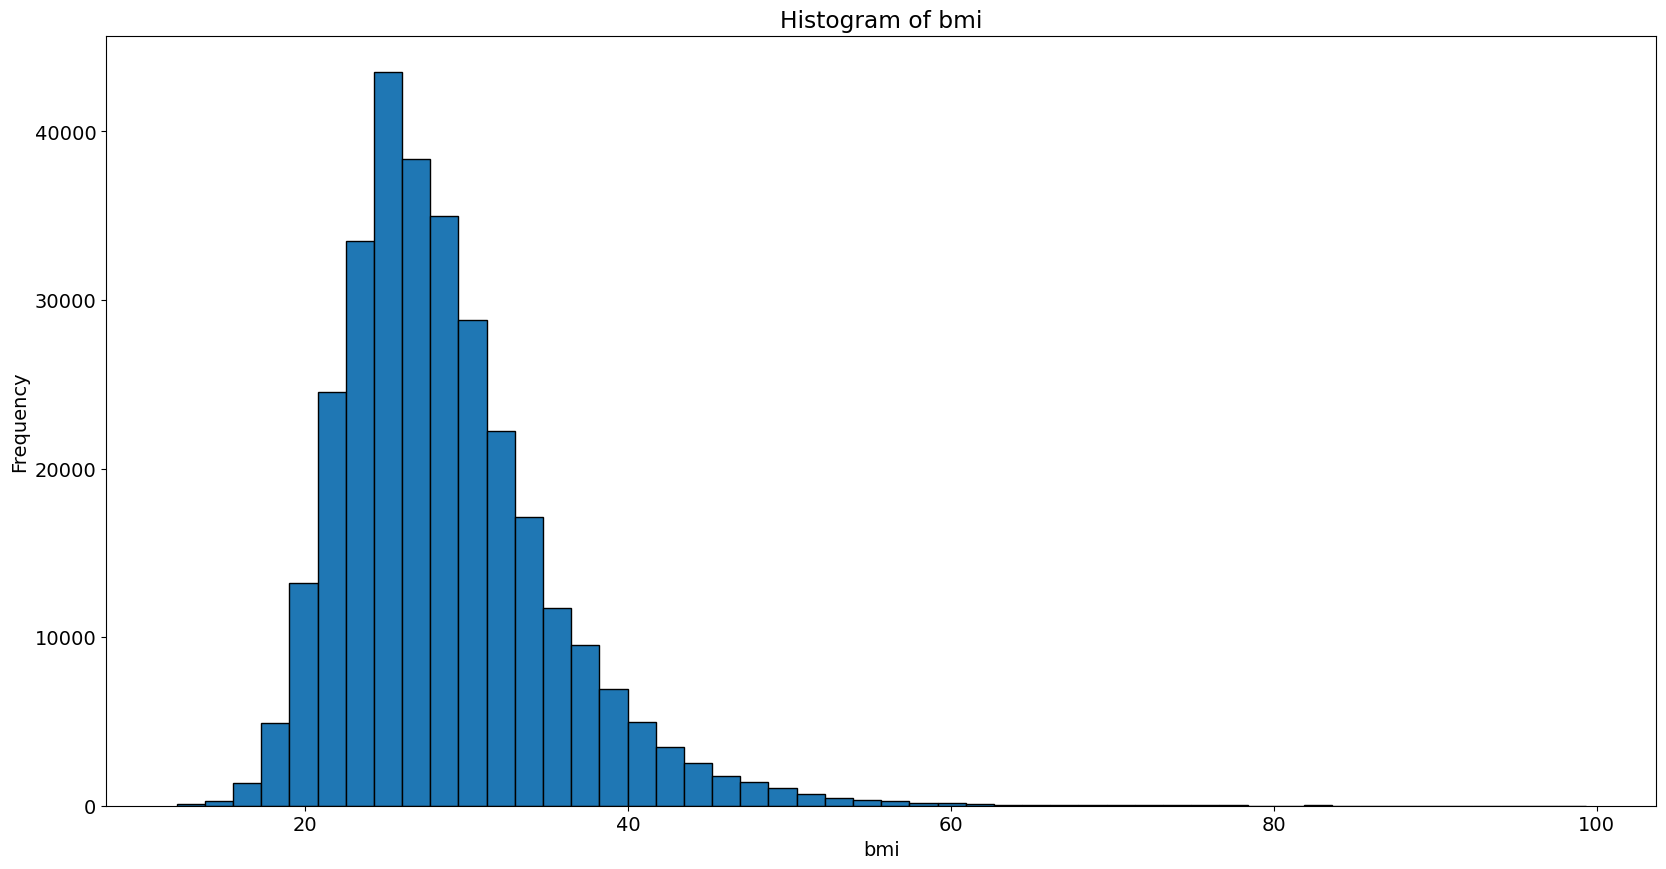

Descriptive Statistics for alcohol_consumption column:
count   308854.0000
mean         5.0964
std          8.1998
min          0.0000
25%          0.0000
50%          1.0000
75%          6.0000
max         30.0000
Name: alcohol_consumption, dtype: float64
Kurtosis of alcohol_consumption column: 2.540200304931095
Skewness of alcohol_consumption column: 1.8856130421485664


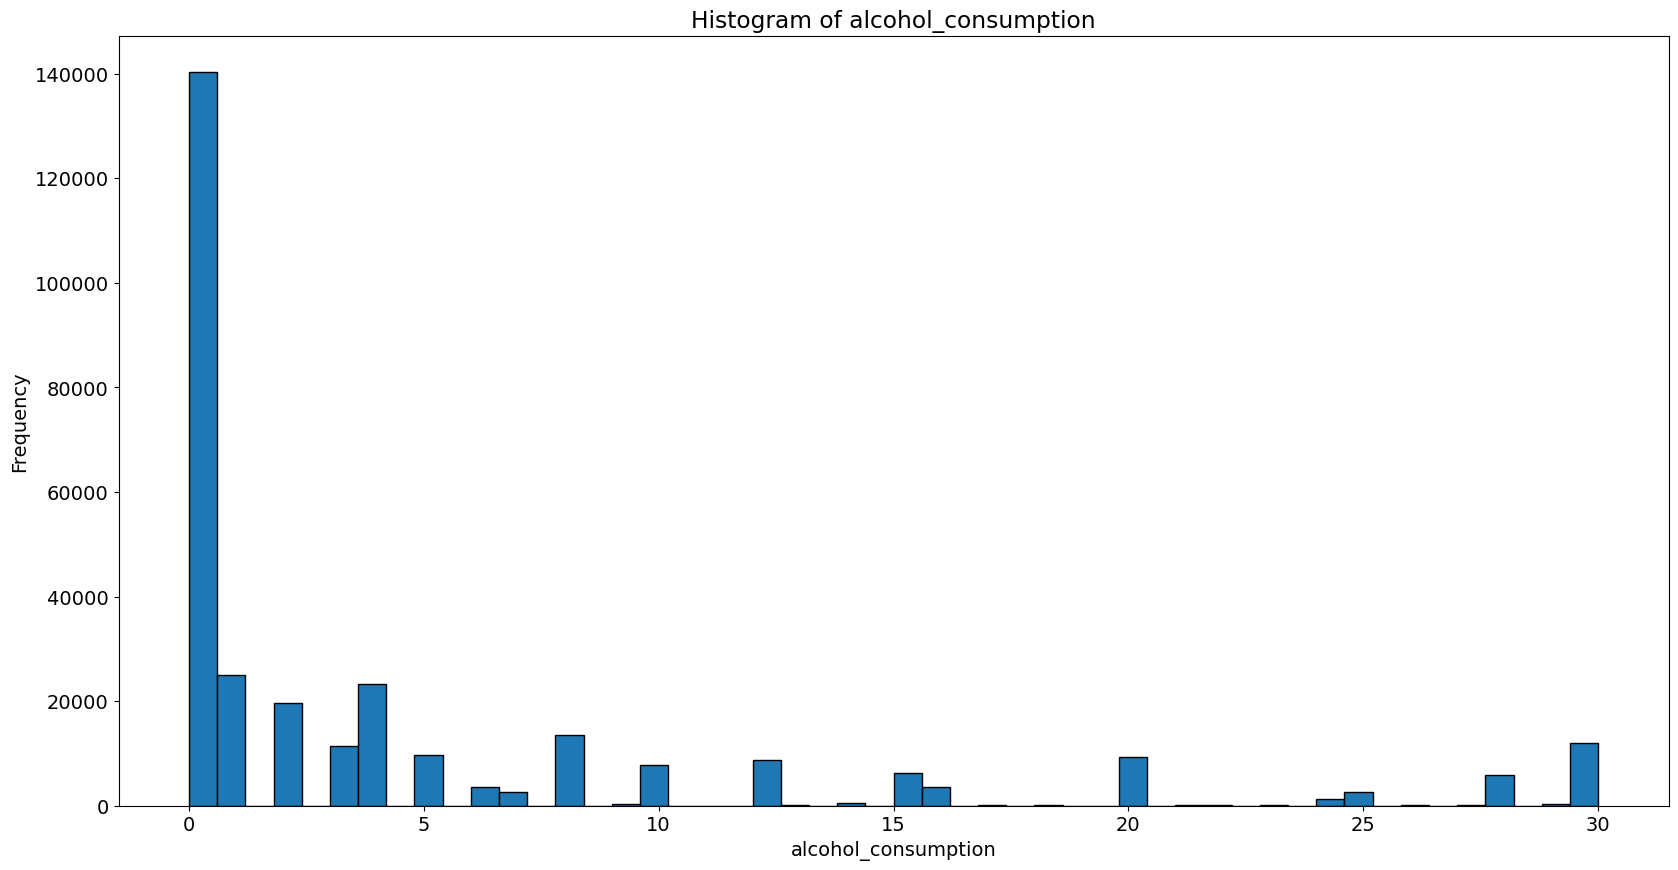

Descriptive Statistics for fruit_consumption column:
count   308854.0000
mean        29.8352
std         24.8757
min          0.0000
25%         12.0000
50%         30.0000
75%         30.0000
max        120.0000
Name: fruit_consumption, dtype: float64
Kurtosis of fruit_consumption column: 1.2537480472716451
Skewness of fruit_consumption column: 1.2484220748669927


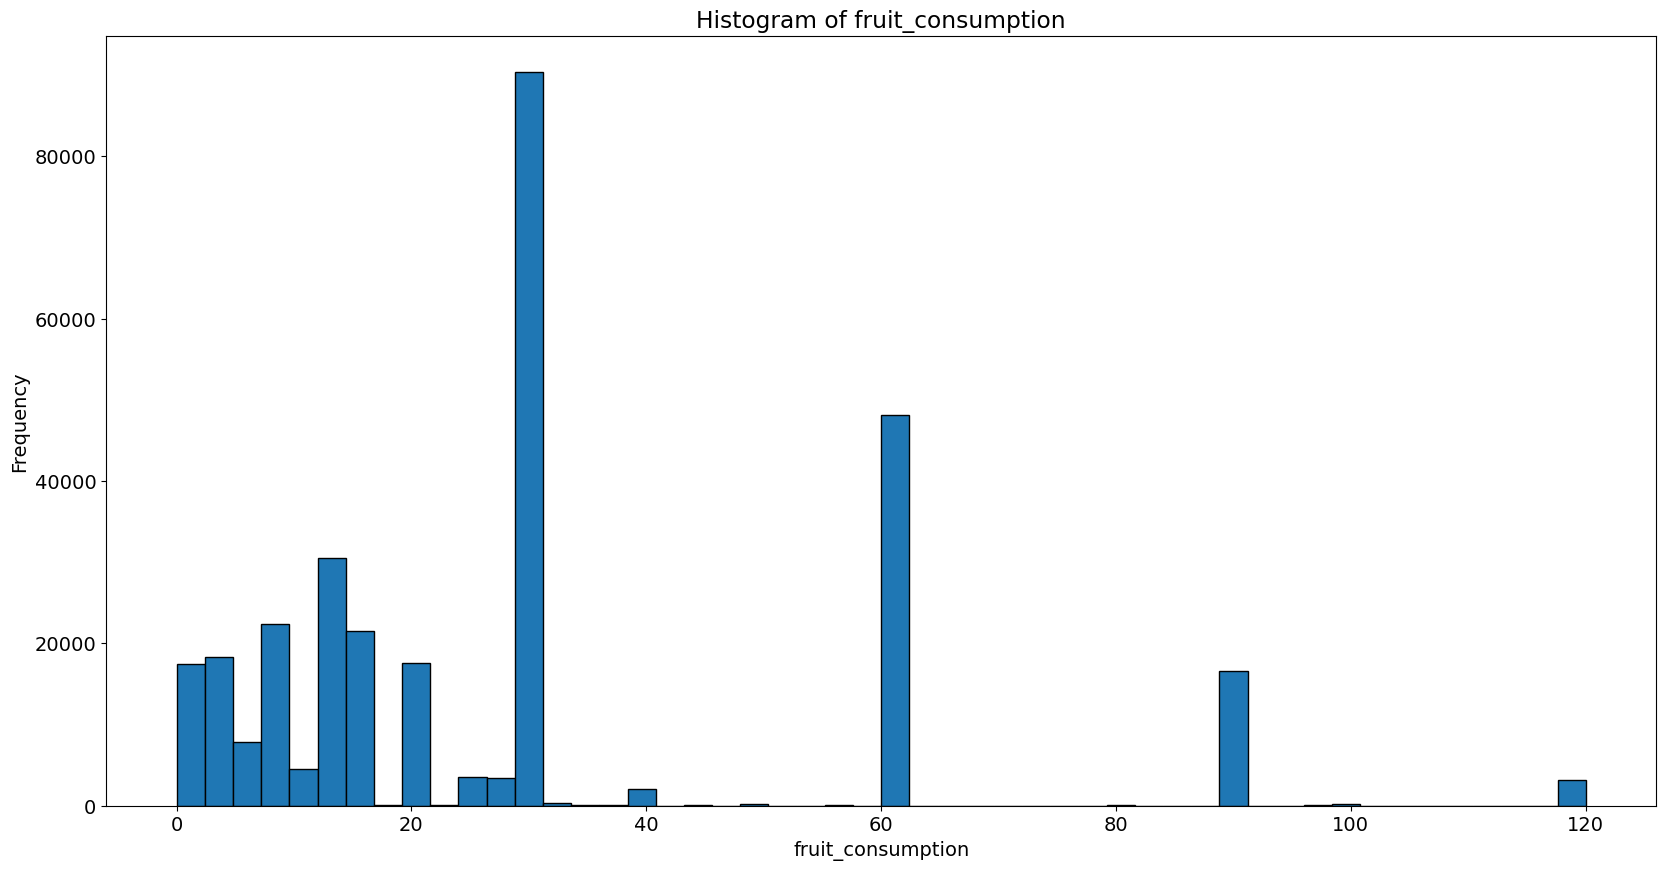

Descriptive Statistics for green_vegetables_consumption column:
count   308854.0000
mean        15.1104
std         14.9262
min          0.0000
25%          4.0000
50%         12.0000
75%         20.0000
max        128.0000
Name: green_vegetables_consumption, dtype: float64
Kurtosis of green_vegetables_consumption column: 9.4439137162703
Skewness of green_vegetables_consumption column: 2.4155959339274817


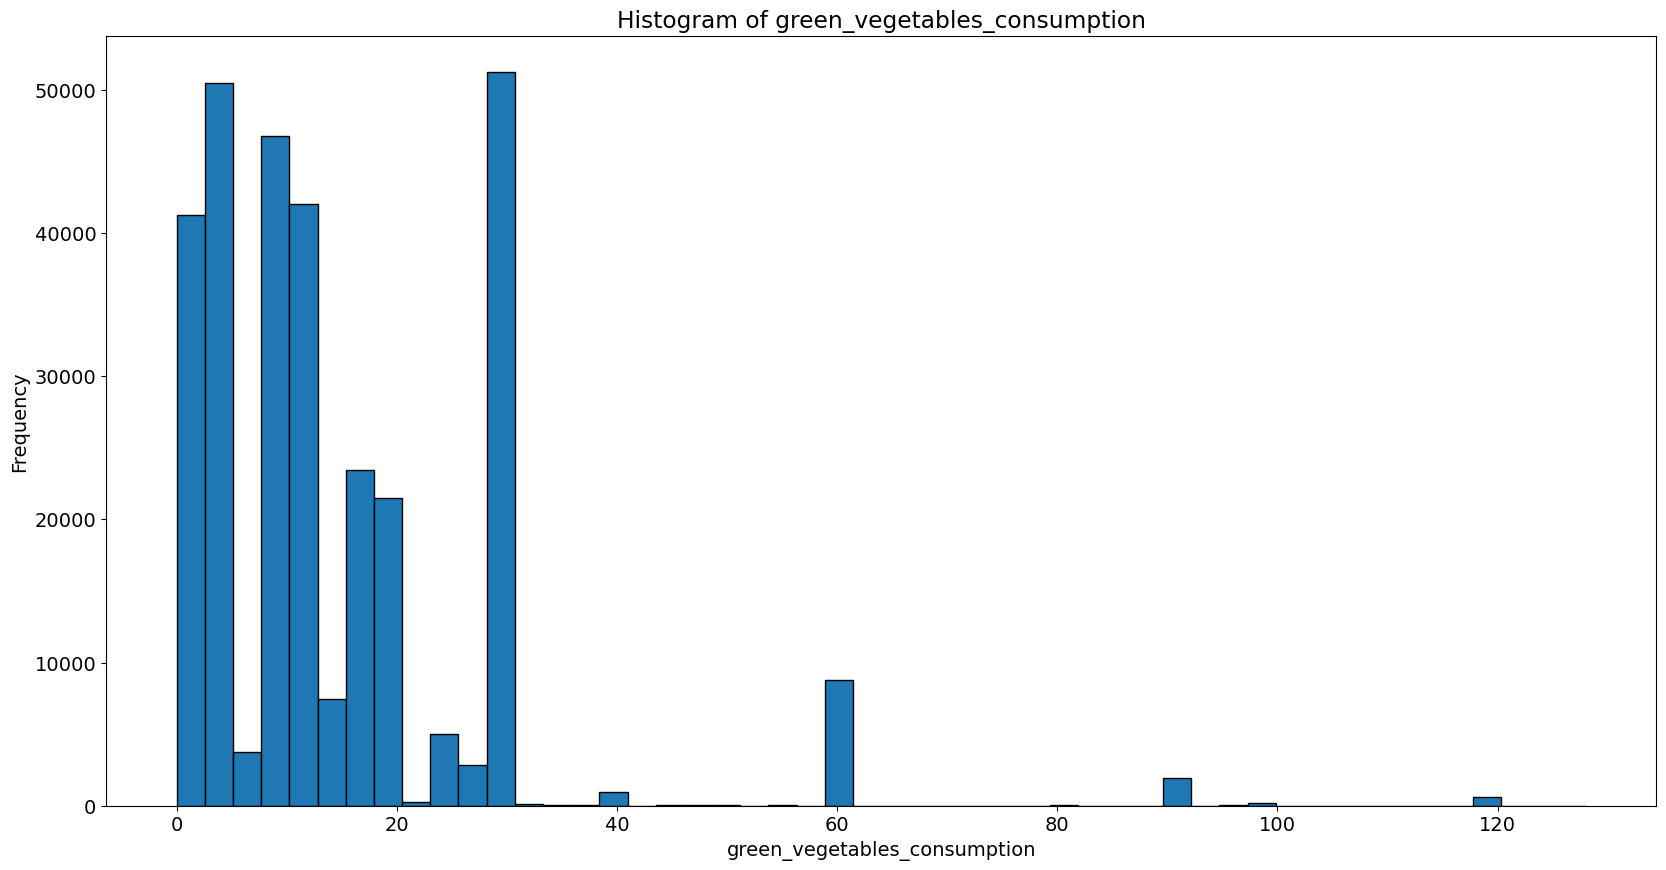

Descriptive Statistics for fried_potato_consumption column:
count   308854.0000
mean         6.2966
std          8.5830
min          0.0000
25%          2.0000
50%          4.0000
75%          8.0000
max        128.0000
Name: fried_potato_consumption, dtype: float64
Kurtosis of fried_potato_consumption column: 42.23021121005559
Skewness of fried_potato_consumption column: 4.9123257144132175


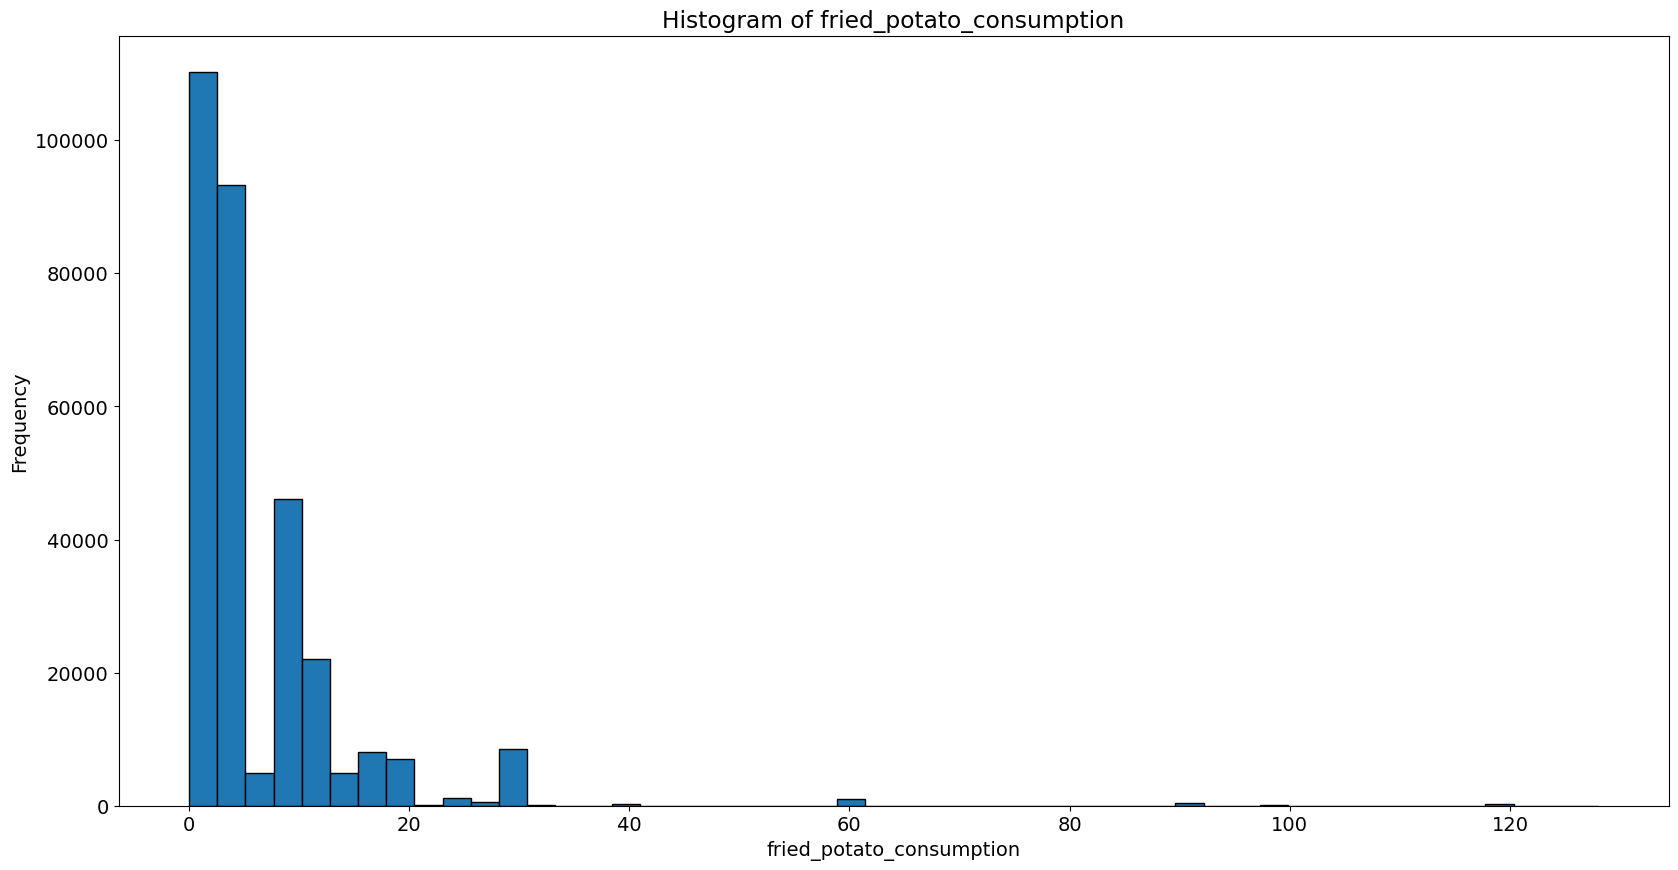

Descriptive Statistics for weight_lbs column:
count   308854.0000
mean       184.2812
std         47.0537
min         55.0053
25%        150.0023
50%        180.0072
75%        209.9901
max        645.9978
Name: weight_lbs, dtype: float64
Kurtosis of weight_lbs column: 2.573664312310113
Skewness of weight_lbs column: 1.0581985546498376


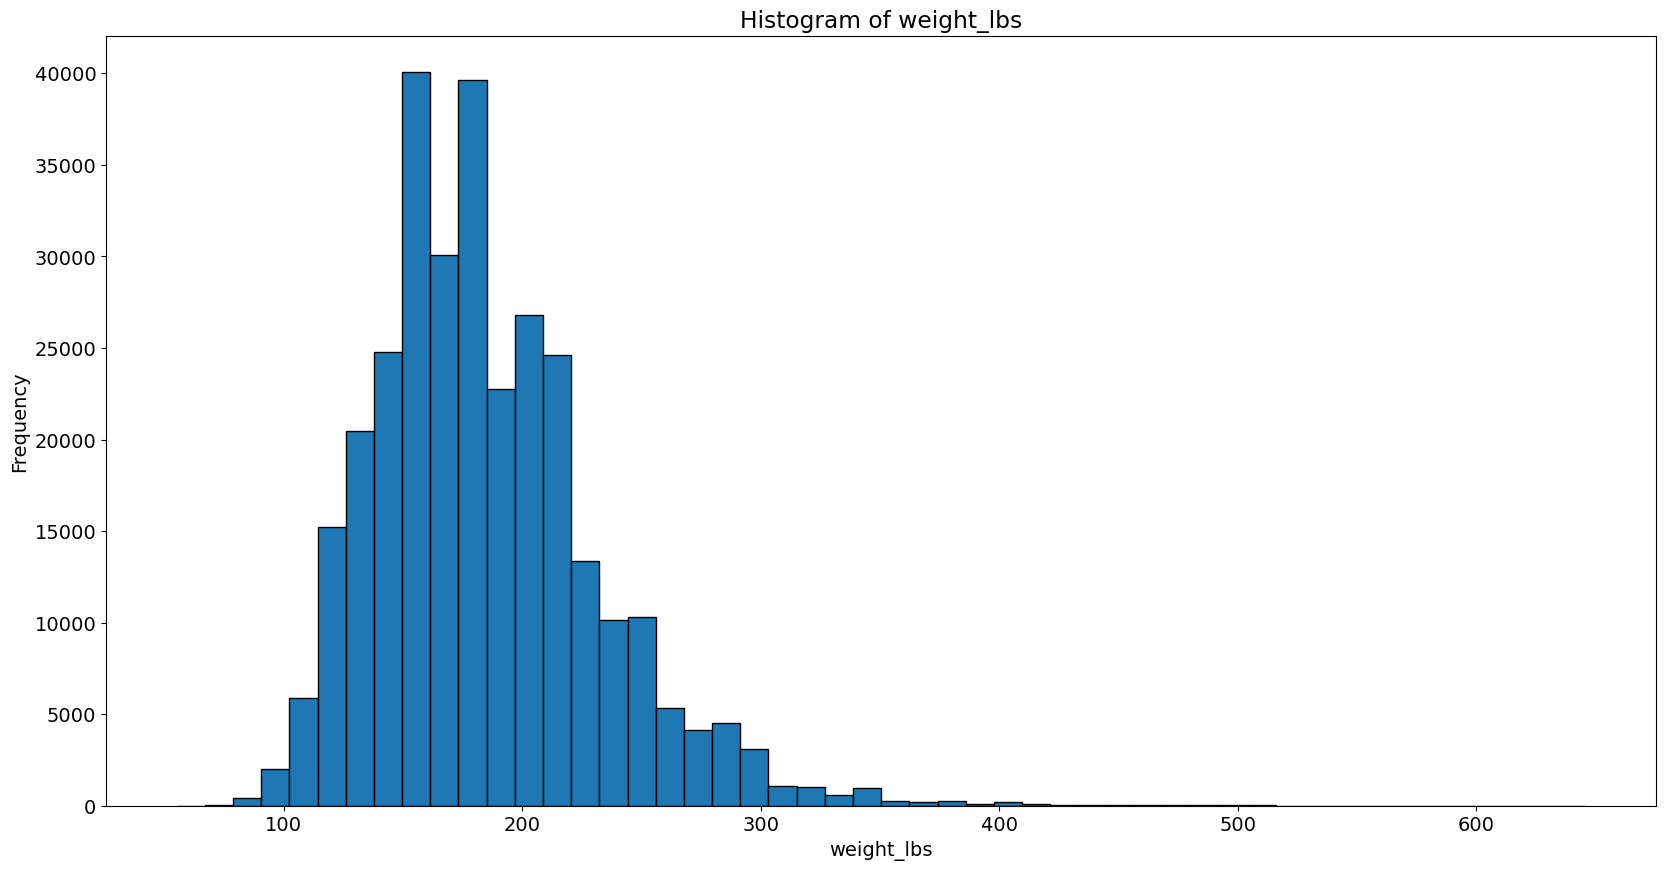

Descriptive Statistics for height_inches column:
count   308854.0000
mean        67.1714
std          4.1961
min         35.8268
25%         64.1733
50%         66.9292
75%         70.0788
max         94.8819
Name: height_inches, dtype: float64
Kurtosis of height_inches column: 0.005746229556401694
Skewness of height_inches column: 0.015311122479316755


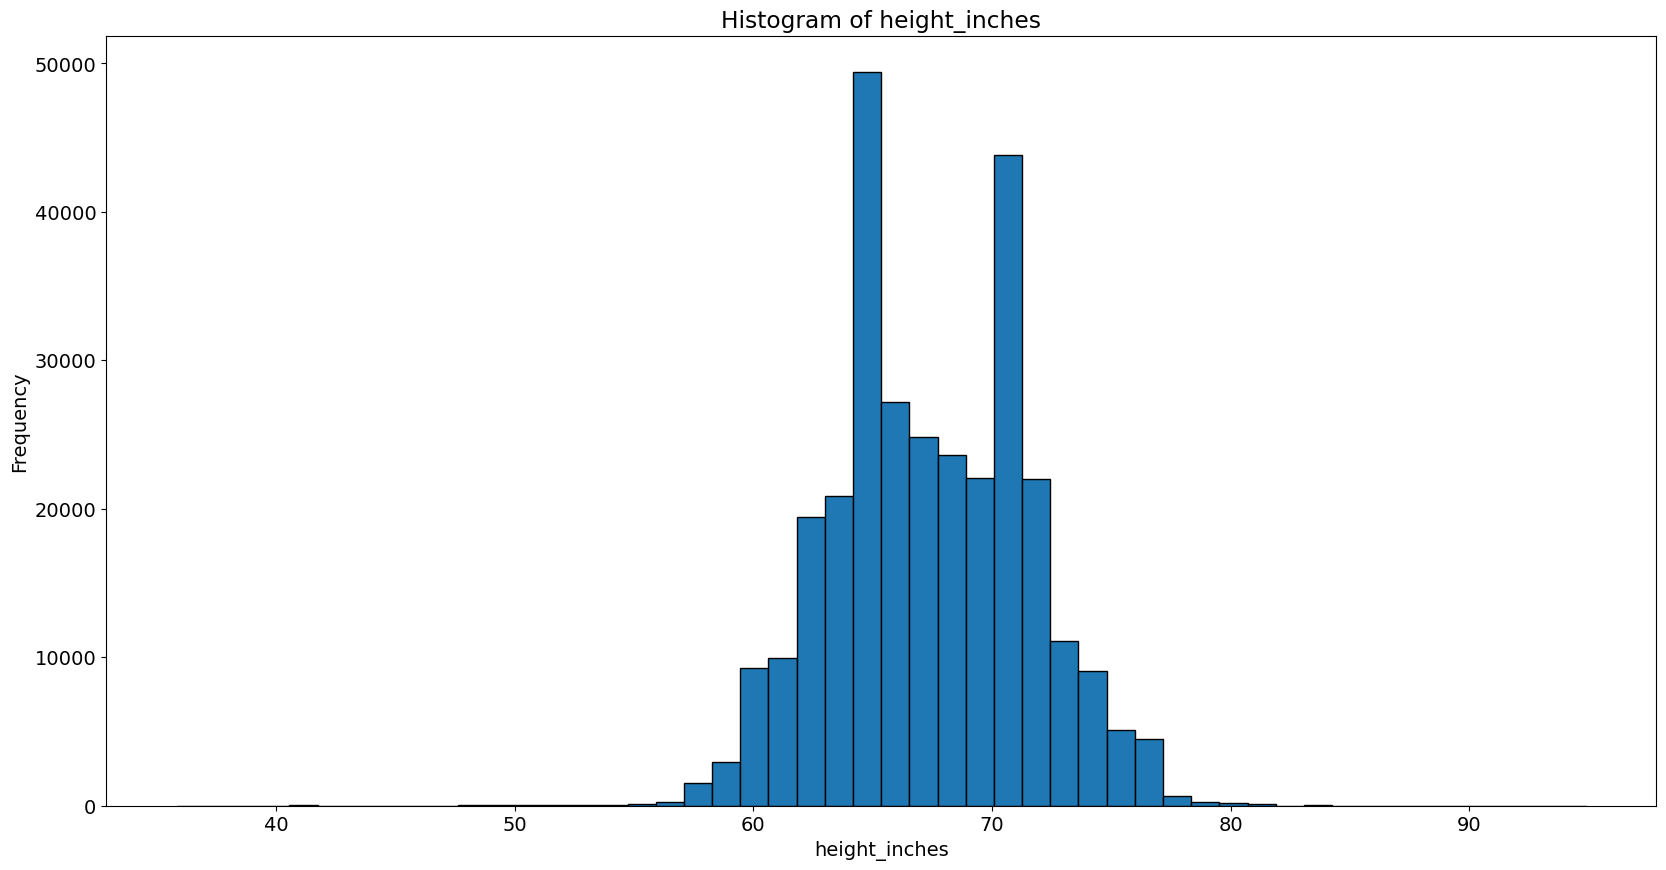

Descriptive Statistics for height_feet column:
count   308854.0000
mean         5.5976
std          0.3497
min          2.9856
25%          5.3478
50%          5.5774
75%          5.8399
max          7.9068
Name: height_feet, dtype: float64
Kurtosis of height_feet column: 0.005746229556402138
Skewness of height_feet column: 0.015311122479310263


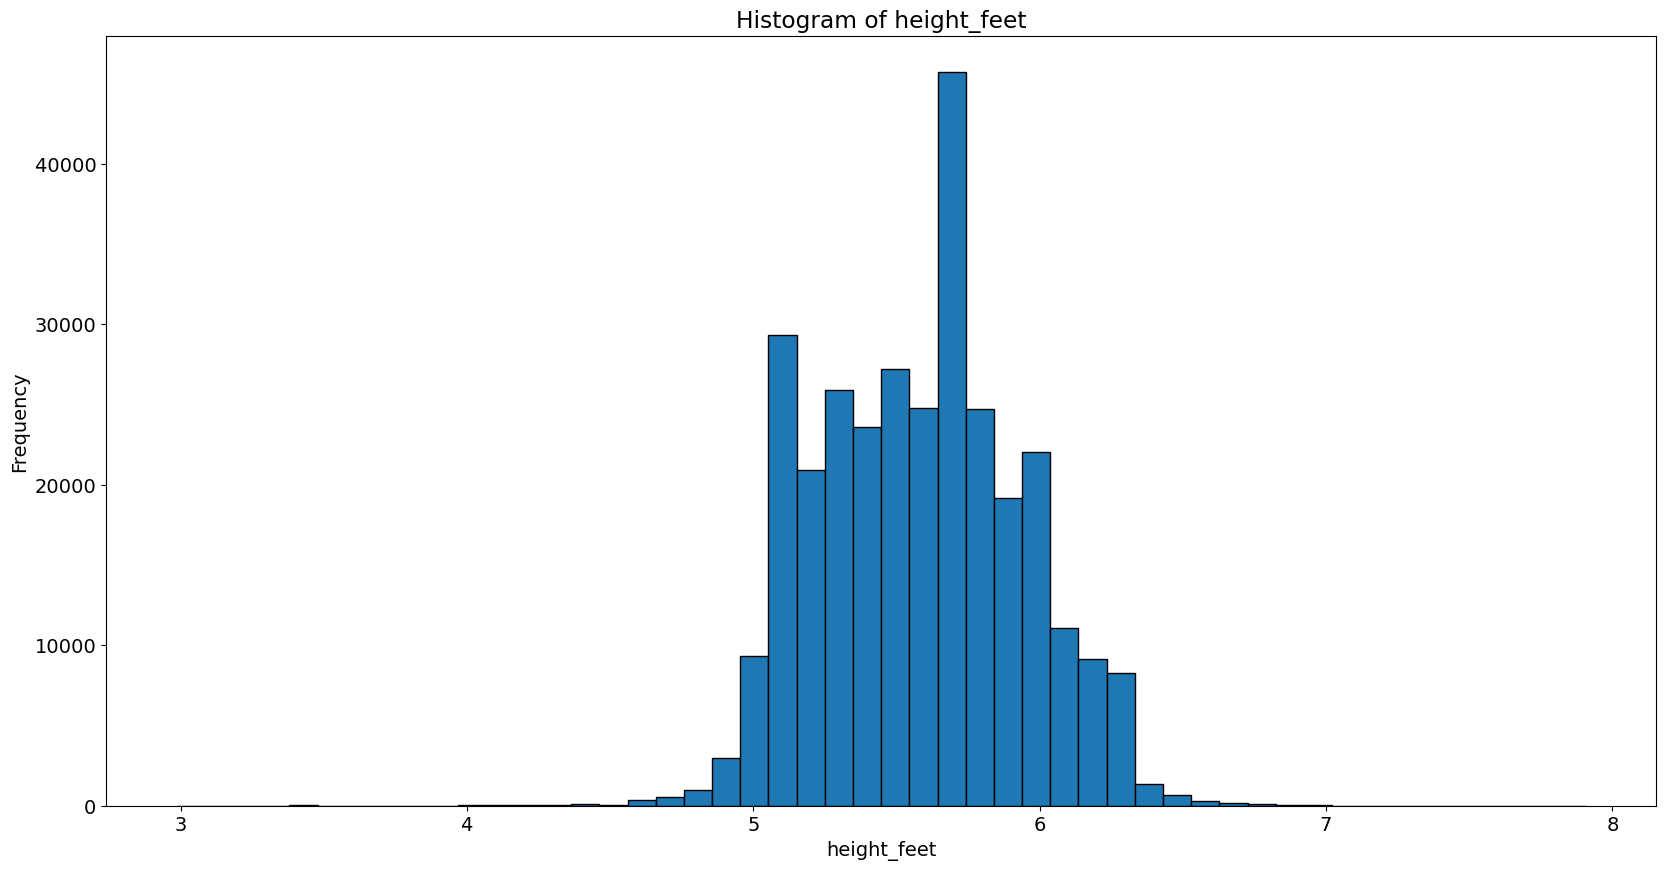

In [21]:
for numerical_column in numerical_columns:
    numerical_description_and_histogram(numerical_column, cdrpd, 50, 20, 10)

In [22]:
correlation_matrix = cdrpd[numerical_columns].corr()
correlation_matrix

,height_cm,weight_kg,bmi,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption,weight_lbs,height_inches,height_feet
height_cm,1.0000,0.4722,-0.0274,0.1288,-0.0459,-0.0301,0.1088,0.4722,1.0000,1.0000
weight_kg,0.4722,1.0000,0.8597,-0.0324,-0.0906,-0.0759,0.0964,1.0000,0.4722,0.4722
bmi,-0.0274,0.8597,1.0000,-0.1087,-0.0766,-0.0706,0.0484,0.8597,-0.0274,-0.0274
alcohol_consumption,0.1288,-0.0324,-0.1087,1.0000,-0.0126,0.0601,0.0205,-0.0324,0.1288,0.1288
fruit_consumption,-0.0459,-0.0906,-0.0766,-0.0126,1.0000,0.2704,-0.0603,-0.0906,-0.0459,-0.0459
green_vegetables_consumption,-0.0301,-0.0759,-0.0706,0.0601,0.2704,1.0000,0.0032,-0.0759,-0.0301,-0.0301
fried_potato_consumption,0.1088,0.0964,0.0484,0.0205,-0.0603,0.0032,1.0000,0.0964,0.1088,0.1088
weight_lbs,0.4722,1.0000,0.8597,-0.0324,-0.0906,-0.0759,0.0964,1.0000,0.4722,0.4722
height_inches,1.0000,0.4722,-0.0274,0.1288,-0.0459,-0.0301,0.1088,0.4722,1.0000,1.0000
height_feet,1.0000,0.4722,-0.0274,0.1288,-0.0459,-0.0301,0.1088,0.4722,1.0000,1.0000


In [23]:
def correlation_heatmap(cor_matrix):
    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(28, 21))
    heatmap = sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", square=True, vmin=-1, vmax=1)

    # Increase font size of axes labels
    heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=40)
    heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=40)

    # Increase font size of axes labels
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.title("Correlation Matrix Heatmap")
    plt.show()

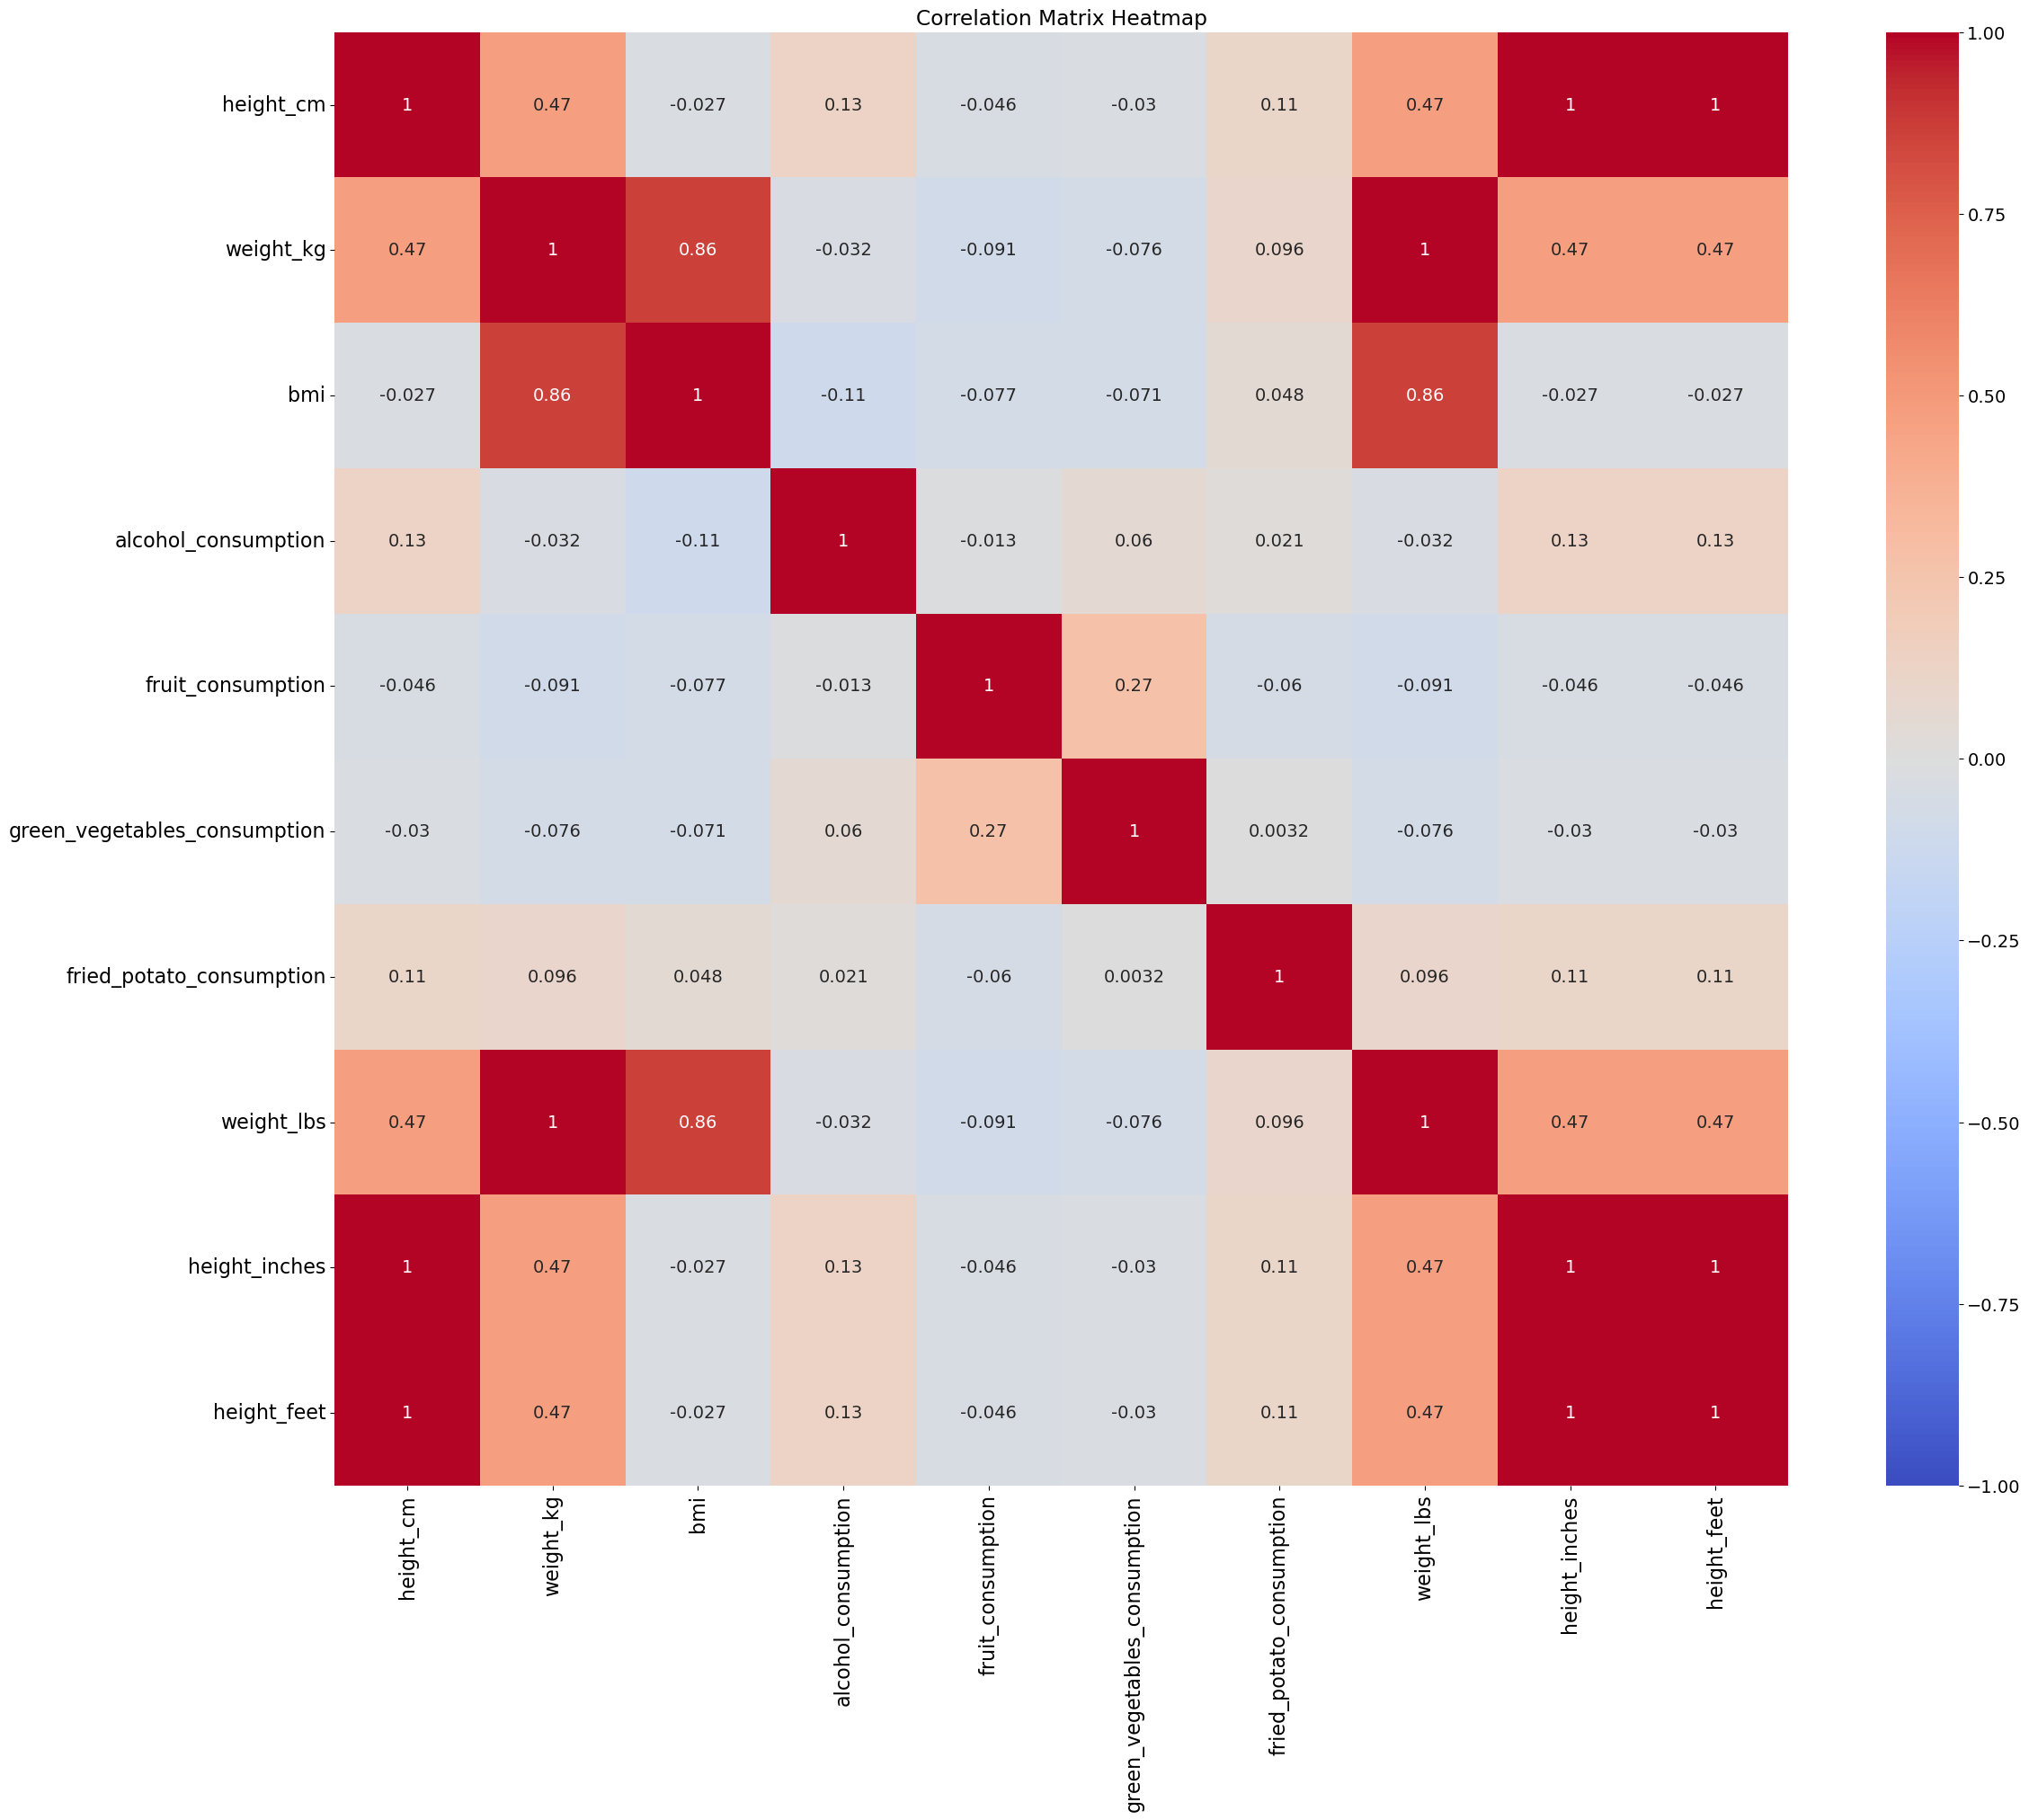

In [24]:
correlation_heatmap(correlation_matrix)

## Building a Machine Learning Model to Explain 'general-health'

In [83]:
print(string_columns)
print()
print(numerical_columns)

['exercise', 'sex', 'age_category', 'smoking_history']

['height_feet', 'weight_lbs', 'bmi', 'alcohol_consumption', 'fruit_consumption', 'green_vegetables_consumption', 'fried_potato_consumption']


In [84]:
cdrpd_encoded_strings = cdrpd.copy()
cdrpd_encoded_strings

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height_cm,weight_kg,bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption,row_number,weight_lbs,height_inches,height_feet
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0000,32.6600,14.5400,Yes,0.0000,30.0000,16.0000,12.0000,1,72.0029,59.0552,4.9213
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0000,77.1100,28.2900,No,0.0000,30.0000,0.0000,4.0000,2,169.9982,64.9607,5.4134
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0000,88.4500,33.4700,No,4.0000,12.0000,3.0000,16.0000,3,194.9986,64.1733,5.3478
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0000,93.4400,28.7300,No,0.0000,30.0000,30.0000,8.0000,4,205.9997,70.8662,5.9055
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0000,88.4500,24.3700,Yes,0.0000,8.0000,4.0000,0.0000,5,194.9986,75.1969,6.2664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0000,81.6500,29.0500,No,4.0000,30.0000,8.0000,0.0000,308850,180.0072,66.1418,5.5118
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0000,69.8500,21.4800,No,8.0000,15.0000,60.0000,4.0000,308851,153.9927,70.8662,5.9055
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0000,61.2300,24.6900,Yes,4.0000,40.0000,8.0000,4.0000,308852,134.9889,61.8111,5.1509
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0000,79.3800,23.7300,No,3.0000,30.0000,12.0000,0.0000,308853,175.0027,72.0473,6.0039


In [85]:
cdrpd_encoded_strings = pd.DataFrame(cdrpd_encoded_strings[['general_health', 'exercise', 'sex', 'age_category', 
                                                      'height_feet', 'weight_lbs', 'bmi', 'smoking_history', 
                                                      'alcohol_consumption', 'fruit_consumption', 
                                                      'green_vegetables_consumption', 'fried_potato_consumption']])

In [86]:
cdrpd_encoded_strings

,general_health,exercise,sex,age_category,height_feet,weight_lbs,bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption
0,Poor,No,Female,70-74,4.9213,72.0029,14.5400,Yes,0.0000,30.0000,16.0000,12.0000
1,Very Good,No,Female,70-74,5.4134,169.9982,28.2900,No,0.0000,30.0000,0.0000,4.0000
2,Very Good,Yes,Female,60-64,5.3478,194.9986,33.4700,No,4.0000,12.0000,3.0000,16.0000
3,Poor,Yes,Male,75-79,5.9055,205.9997,28.7300,No,0.0000,30.0000,30.0000,8.0000
4,Good,No,Male,80+,6.2664,194.9986,24.3700,Yes,0.0000,8.0000,4.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Yes,Male,25-29,5.5118,180.0072,29.0500,No,4.0000,30.0000,8.0000,0.0000
308850,Fair,Yes,Male,65-69,5.9055,153.9927,21.4800,No,8.0000,15.0000,60.0000,4.0000
308851,Very Good,Yes,Female,30-34,5.1509,134.9889,24.6900,Yes,4.0000,40.0000,8.0000,4.0000
308852,Very Good,Yes,Male,65-69,6.0039,175.0027,23.7300,No,3.0000,30.0000,12.0000,0.0000


In [87]:
string_columns = cdrpd_encoded_strings.select_dtypes(include='object').columns.tolist()
print(f'There are {len(string_columns)} string variables in the data set')
print(string_columns)
print()
numerical_columns = cdrpd_encoded_strings.select_dtypes(include='float').columns.tolist()
print(f'There are {len(numerical_columns)} numerical variables in the data set')
print(numerical_columns)

There are 5 string variables in the data set
['general_health', 'exercise', 'sex', 'age_category', 'smoking_history']

There are 7 numerical variables in the data set
['height_feet', 'weight_lbs', 'bmi', 'alcohol_consumption', 'fruit_consumption', 'green_vegetables_consumption', 'fried_potato_consumption']


In [88]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store the mappings
encoded_mappings = {}

# Initialize label encoders for each column
label_encoders = {column: LabelEncoder() for column in string_columns}

# Label encode categorical columns and store the mappings
for column, encoder in label_encoders.items():
    encoded_values = encoder.fit_transform(cdrpd_encoded_strings[column])
    unique_values = list(set(encoded_values))  # Get unique encoded values
    encoded_mappings[column] = dict(zip(encoder.classes_, unique_values))
    
    # Use .loc to update the DataFrame
    cdrpd_encoded_strings.loc[:, column] = encoded_values

# Print the mappings
for column, mapping in encoded_mappings.items():
    print(f"Mapping for {column}: {mapping}")

Mapping for general_health: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very Good': 4}
Mapping for exercise: {'No': 0, 'Yes': 1}
Mapping for sex: {'Female': 0, 'Male': 1}
Mapping for age_category: {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12}
Mapping for smoking_history: {'No': 0, 'Yes': 1}


In [89]:
cdrpd_encoded_strings

,general_health,exercise,sex,age_category,height_feet,weight_lbs,bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption
0,3,0,0,10,4.9213,72.0029,14.5400,1,0.0000,30.0000,16.0000,12.0000
1,4,0,0,10,5.4134,169.9982,28.2900,0,0.0000,30.0000,0.0000,4.0000
2,4,1,0,8,5.3478,194.9986,33.4700,0,4.0000,12.0000,3.0000,16.0000
3,3,1,1,11,5.9055,205.9997,28.7300,0,0.0000,30.0000,30.0000,8.0000
4,2,0,1,12,6.2664,194.9986,24.3700,1,0.0000,8.0000,4.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,1,1,5.5118,180.0072,29.0500,0,4.0000,30.0000,8.0000,0.0000
308850,1,1,1,9,5.9055,153.9927,21.4800,0,8.0000,15.0000,60.0000,4.0000
308851,4,1,0,2,5.1509,134.9889,24.6900,1,4.0000,40.0000,8.0000,4.0000
308852,4,1,1,9,6.0039,175.0027,23.7300,0,3.0000,30.0000,12.0000,0.0000


In [90]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded your data into 'cdrpd_encoded_strings' dataframe
numerical_columns = ['height_feet', 'weight_lbs', 'bmi', 'alcohol_consumption', 'fruit_consumption', 'green_vegetables_consumption', 'fried_potato_consumption']
string_columns = ['exercise', 'sex', 'age_category', 'smoking_history']

# Standardize numerical variables
scaler = StandardScaler()
cdrpd_encoded_strings[numerical_columns] = scaler.fit_transform(cdrpd_encoded_strings[numerical_columns])

# Split data into features and labels
X = cdrpd_encoded_strings.drop('general_health', axis=1)
y = cdrpd_encoded_strings['general_health']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    
    # Add your hidden layers here
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(6, activation='softmax')  # Output layer with appropriate number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.3124 - accuracy: 0.4038 - val_loss: 1.3016 - val_accuracy: 0.4064
Epoch 2/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2984 - accuracy: 0.4087 - val_loss: 1.2992 - val_accuracy: 0.4104
Epoch 3/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2954 - accuracy: 0.4102 - val_loss: 1.2960 - val_accuracy: 0.4105
Epoch 4/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2943 - accuracy: 0.4094 - val_loss: 1.2958 - val_accuracy: 0.4113
Epoch 5/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2933 - accuracy: 0.4102 - val_loss: 1.2960 - val_accuracy: 0.4097
Epoch 6/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2925 - accuracy: 0.4119 - val_loss: 1.2954 - val_accuracy: 0.4100
Epoch 7/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2921 - accuracy: 0.4116 - val_loss: 1.2964 - val_accuracy: